# Import relevant libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import seaborn as sns
import re
import zipfile
import os

# Load Data

## Extract the ZIP file

In [ ]:
# Extract the ZIP file
zip_path = "C://Users//User//Documents//Portfolio Projects//Python Projects//Customer-Churn-Prediction//iranian+churn+dataset.zip"
extract_dir = "C://Users//User//Documents//Portfolio Projects//Python Projects//Customer-Churn-Prediction//Customer Churn"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Find the CSV/XLS file inside the extracted folder
file_list = os.listdir(extract_dir)
print("Extracted files:", file_list)

Extracted files: ['Customer Churn.csv']


## Import the dataset

In [3]:
# Import the dataset

df = pd.read_csv('../Customer Churn/Customer Churn.csv')

# Preview the dataset
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


### Add Customer ID column

In [3]:
# Add Customer ID column
df.insert(0, 'CustomerID', ['CUST' + str(i).zfill(5) for i in range(1, len(df) + 1)])

# Preview the dataset
df.head()

,CustomerID,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,CUST00001,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,CUST00002,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,CUST00003,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,CUST00004,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,CUST00005,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [4]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

### Remove leading/trailing spaces

In [4]:
# Remove leading/trailing spaces and reduce multiple spaces to one
df.columns = [re.sub(r'\s+', ' ', col.strip()) for col in df.columns]

# Explore Data

## Quick glance at the data

In [5]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               3150 non-null   object 
 1   Call Failure             3150 non-null   int64  
 2   Complains                3150 non-null   int64  
 3   Subscription Length      3150 non-null   int64  
 4   Charge Amount            3150 non-null   int64  
 5   Seconds of Use           3150 non-null   int64  
 6   Frequency of use         3150 non-null   int64  
 7   Frequency of SMS         3150 non-null   int64  
 8   Distinct Called Numbers  3150 non-null   int64  
 9   Age Group                3150 non-null   int64  
 10  Tariff Plan              3150 non-null   int64  
 11  Status                   3150 non-null   int64  
 12  Age                      3150 non-null   int64  
 13  Customer Value           3150 non-null   float64
 14  Churn                   

In [6]:
# Summary Statistics
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


## Exploratory Data Analysis

### Numerical Features

In [7]:
df.columns

Index(['CustomerID', 'Call Failure', 'Complains', 'Subscription Length',
       'Charge Amount', 'Seconds of Use', 'Frequency of use',
       'Frequency of SMS', 'Distinct Called Numbers', 'Age Group',
       'Tariff Plan', 'Status', 'Age', 'Customer Value', 'Churn'],
      dtype='object')

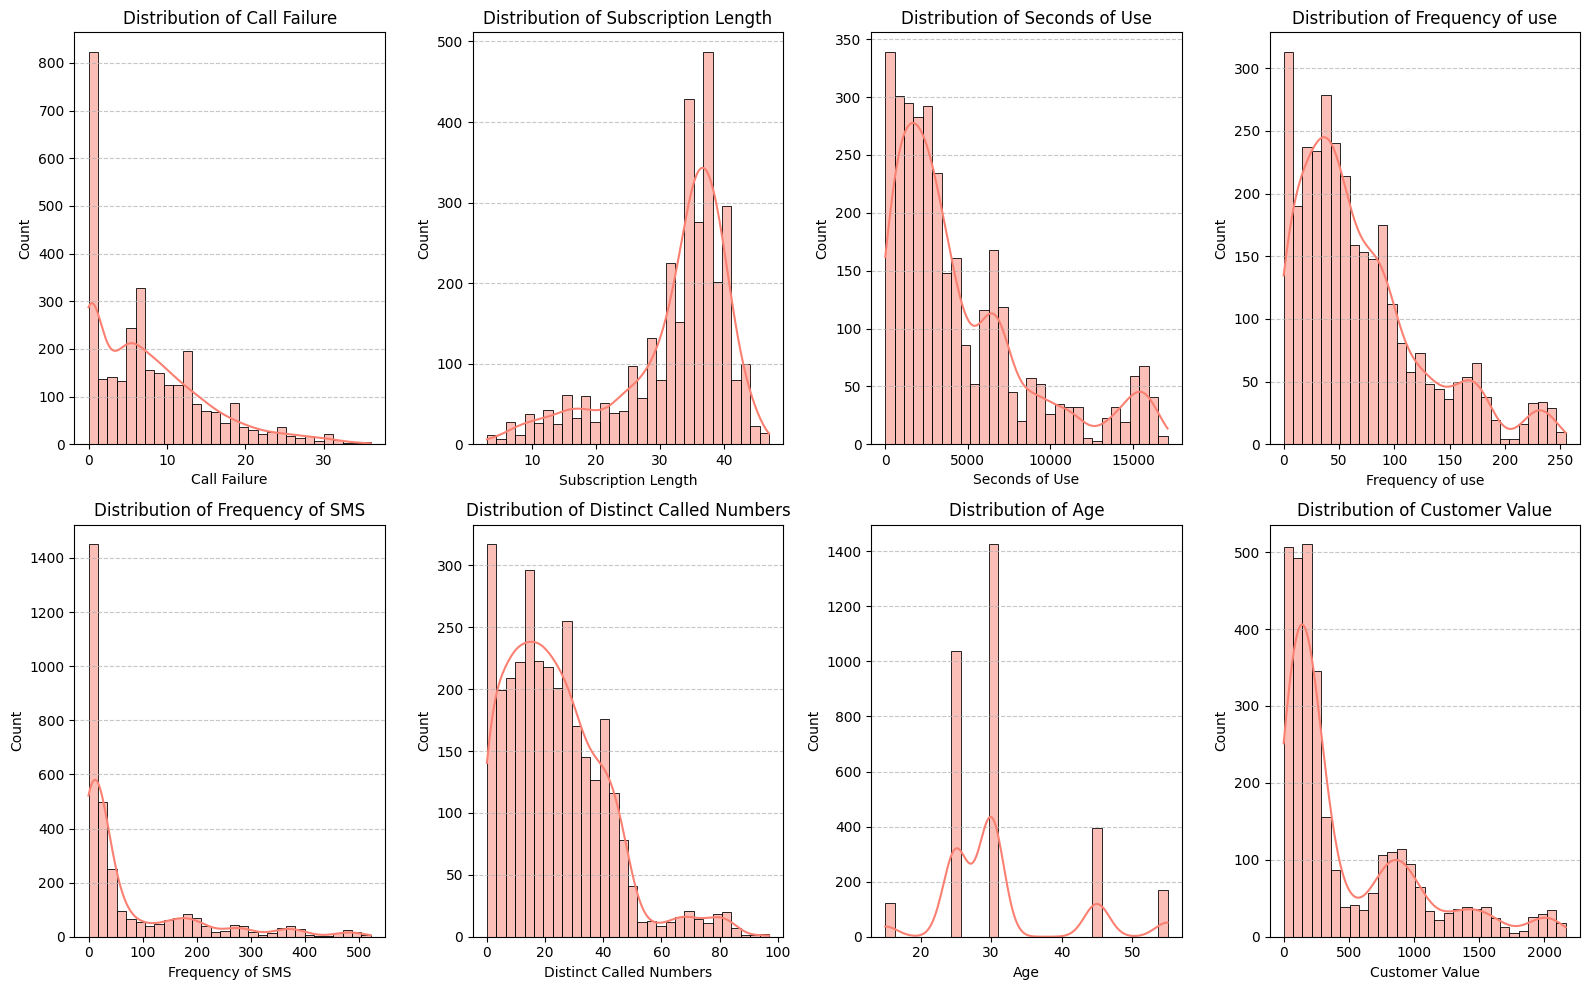

In [8]:
def plot_numeric_distributions(df):
    cols = [
        ('Call Failure', 'Distribution of Call Failure'),
        ('Subscription Length', 'Distribution of Subscription Length'),
        ('Seconds of Use', 'Distribution of Seconds of Use'),
        ('Frequency of use', 'Distribution of Frequency of use'),
        ('Frequency of SMS', 'Distribution of Frequency of SMS'),
        ('Distinct Called Numbers', 'Distribution of Distinct Called Numbers'),
        ('Age', 'Distribution of Age'),
        ('Customer Value', 'Distribution of Customer Value'),
    ]

    plt.figure(figsize=(16, 10))
    for i, (col, title) in enumerate(cols, 1):
        plt.subplot(2, 4, i)
        sns.histplot(df[col], kde=True, bins=30, color='salmon')
        plt.title(title)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Call the function
plot_numeric_distributions(df)

### Categorical Features

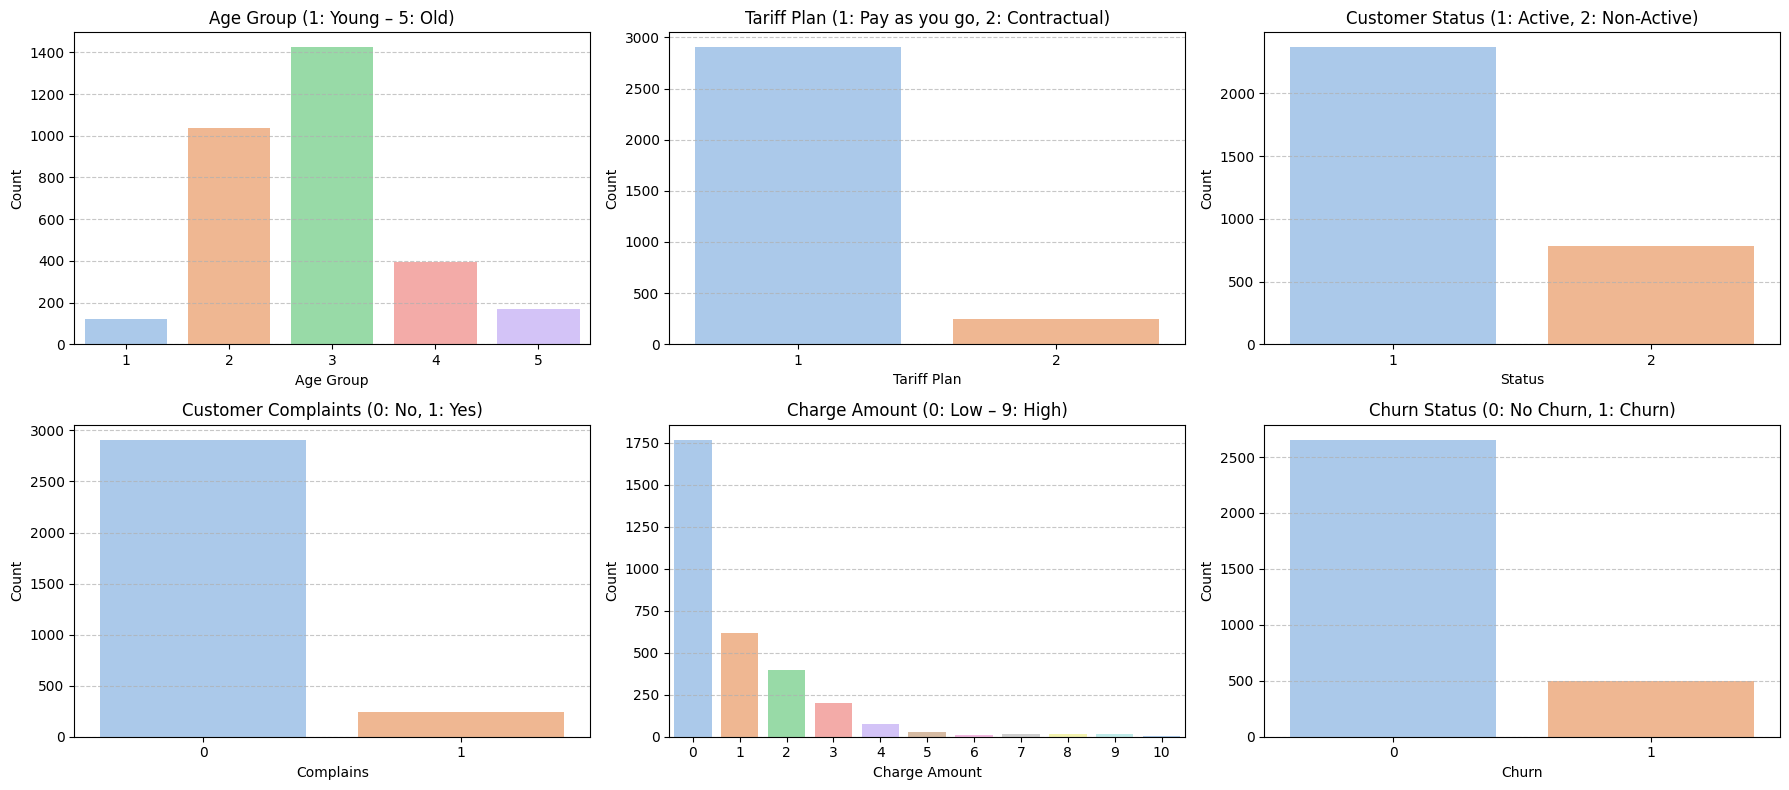

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_distributions(df):
    # List of categorical/ordinal columns and their titles
    cat_cols = [
        ('Age Group', 'Age Group (1: Young – 5: Old)'),
        ('Tariff Plan', 'Tariff Plan (1: Pay as you go, 2: Contractual)'),
        ('Status', 'Customer Status (1: Active, 2: Non-Active)'),
        ('Complains', 'Customer Complaints (0: No, 1: Yes)'),
        ('Charge Amount', 'Charge Amount (0: Low – 9: High)'),
        ('Churn', 'Churn Status (0: No Churn, 1: Churn)')
    ]

    num_plots = len(cat_cols)
    cols_per_row = 3
    rows = (num_plots + cols_per_row - 1) // cols_per_row

    plt.figure(figsize=(6 * cols_per_row, 4 * rows))

    for i, (col, title) in enumerate(cat_cols, 1):
        plt.subplot(rows, cols_per_row, i)
        sns.countplot(data=df, x=col, hue=col, palette='pastel', legend=False)
        plt.title(title)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Call the function
plot_categorical_distributions(df)

## Churn Rate by Categorical variables

### Function used to explore each feature

In [10]:
# function to create a stacked bar chart
def plot_stacked_churn_percent(df, feature_col, target_col='Churn'):
    # Calculate % of churn vs non-churn per category
    cross_tab = pd.crosstab(df[feature_col], df[target_col], normalize='index') * 100
    cross_tab.columns = ['No Churn', 'Churn']
    cross_tab = cross_tab.sort_index()

    ax = cross_tab.plot(kind='bar', stacked=True, color=['#91bfdb', '#fc8d62'], figsize=(10, 6))

    plt.title(f'Churn Proportion by {feature_col}', fontsize=16)
    plt.xlabel(feature_col, fontsize=13)
    plt.ylabel('Percentage of Customers', fontsize=13)
    plt.xticks(rotation=45)
    plt.legend(title='Churn')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

    # Add percentage labels
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}%', 
                        (p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
                        ha='center', va='center', fontsize=10, color='white')
    
    plt.tight_layout()
    plt.show()

#### Complains

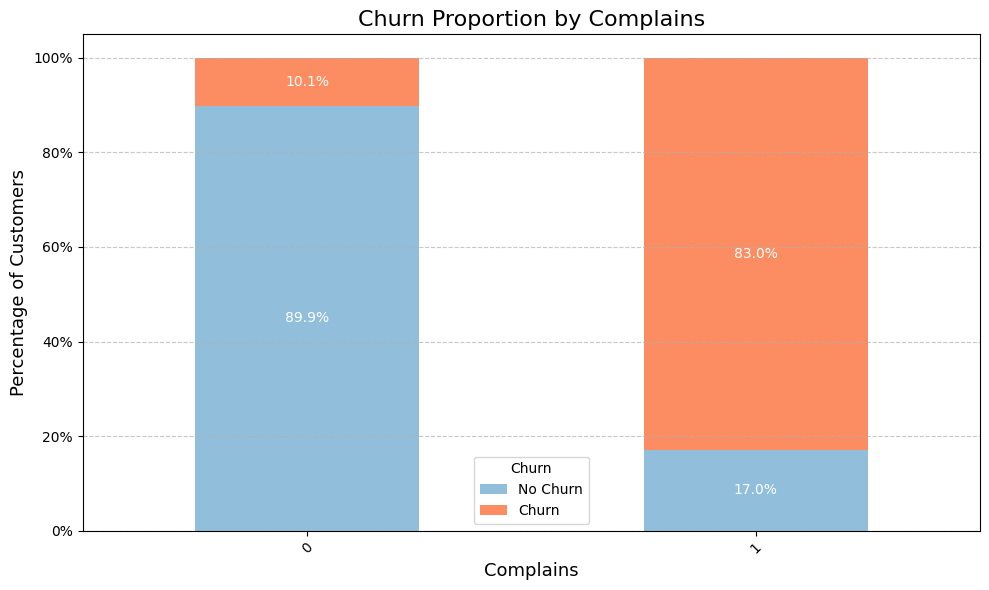

In [12]:
plot_stacked_churn_percent(df, 'Complains')

**Insights:**

- Complaints are a major churn predictor: Customers who register complaints are more than 8 times more likely to churn than those who don’t.

### Charge Amount

In [14]:
# Group Charge Amount into Low / Medium / High
def map_charge_amount(val):
    if val <= 3:
        return 'Low'
    elif val <= 6:
        return 'Medium'
    else:
        return 'High'
    
df['Charge Amount Group'] = df['Charge Amount'].apply(map_charge_amount)

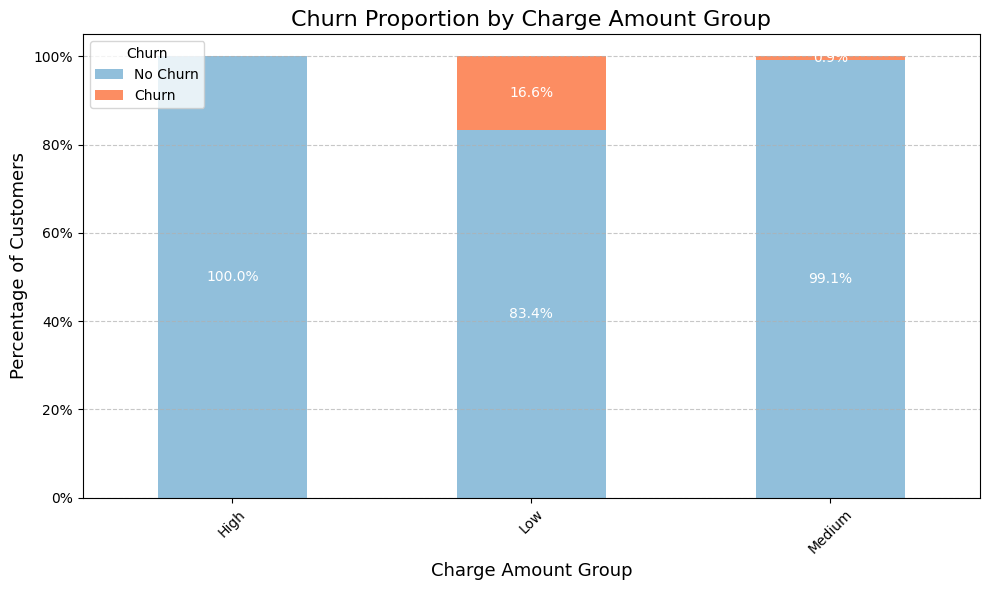

In [15]:
plot_stacked_churn_percent(df, 'Charge Amount Group')

**Insights:**

- Low Charge Group: Highest churn at 16.6% — these customers may be less committed or more sensitive to pricing.

- Medium Charge Group: Very low churn at 0.9% — strong retention here, possibly the sweet spot for value.

- High Charge Group: Zero churn — these customers are highly loyal, likely high-value users.

### Age Group

In [16]:
# Group Age Group into broader labels
def map_age_group(val):
    if val == 1 or val == 2:
        return 'Young'
    elif val == 3:
        return 'Middle Aged'
    else:
        return 'Older'

df['Age Group Label'] = df['Age Group'].apply(map_age_group)

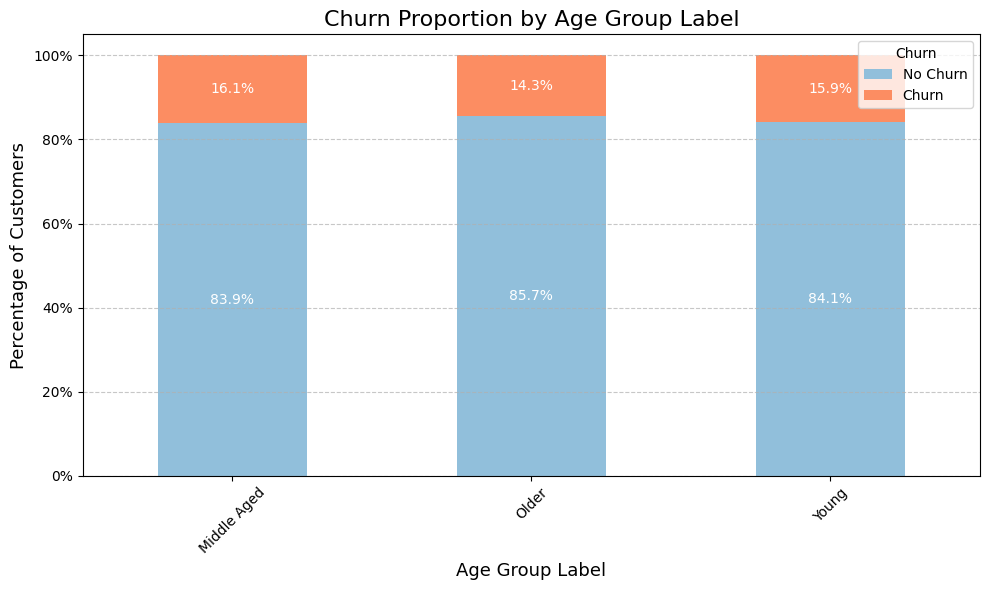

In [17]:
plot_stacked_churn_percent(df, 'Age Group Label')

**Insights:**

- Churn is fairly consistent across age groups, all under 17%.

- Older customers show the strongest loyalty with lowest churn.

### Tariff Plan

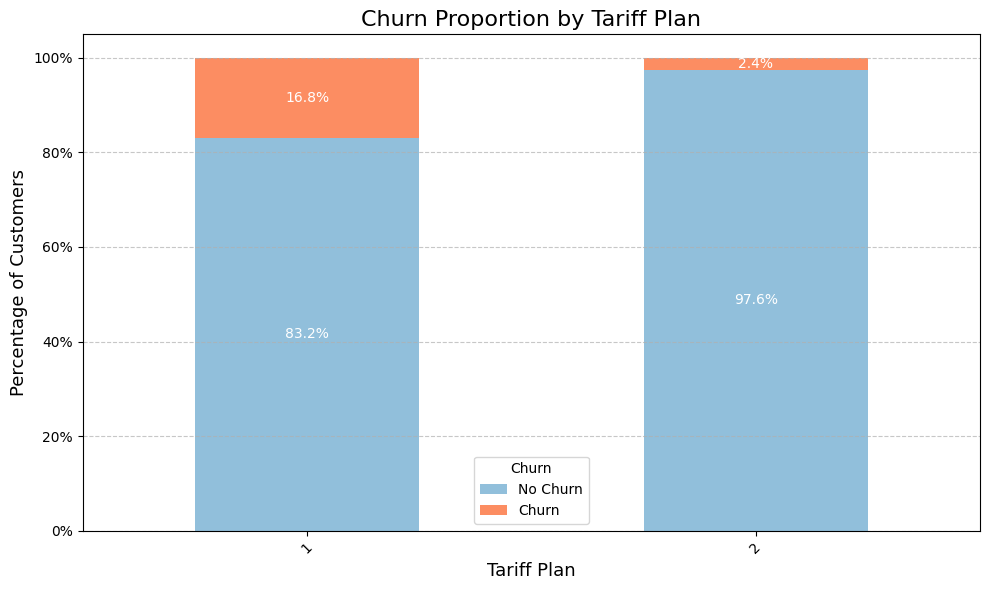

In [18]:
plot_stacked_churn_percent(df, 'Tariff Plan')

**Insight:**

- Customers on contractual plans are much less likely to churn—they seem more committed or locked in.

- Pay-as-you-go users churn more, possibly due to lower switching costs or flexibility.

### Status

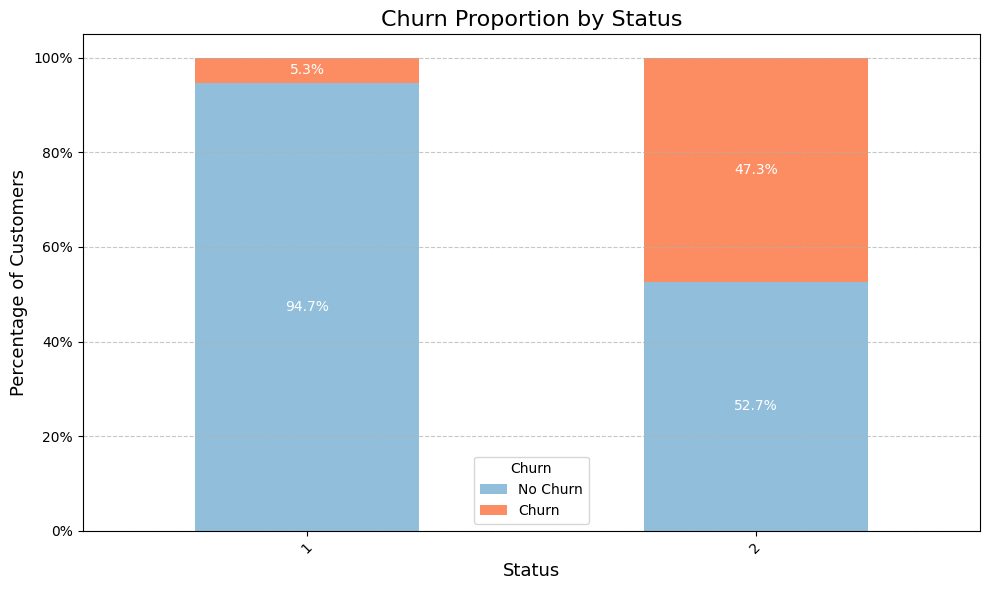

In [22]:
plot_stacked_churn_percent(df, 'Status')

**Insights:**

- Active (1: active) users rarely churn — just 5.3% leave.

- Non-active (2: non-active) users churn a lot — nearly half (47.3%) don’t stay.

- Being active is a strong sign that someone will stick around.

## Other Features

### Function used to explore other feature

In [24]:
def plot_stacked_churn_percent(df, categorical_cols, target_col='Churn'):
    for feature_col in categorical_cols:
        # Cross-tabulation to calculate percentage
        cross_tab = pd.crosstab(df[feature_col], df[target_col], normalize='index') * 100
        cross_tab.columns = ['No Churn', 'Churn']
        cross_tab = cross_tab.sort_index()

        # Plot
        ax = cross_tab.plot(
            kind='bar',
            stacked=True,
            color=['#91bfdb','#fc8d62'],
            figsize=(10, 6)
        )

        plt.title(f'Churn Proportion by {feature_col}', fontsize=16)
        plt.xlabel(feature_col, fontsize=13)
        plt.ylabel('Percentage of Customers', fontsize=13)
        plt.xticks(rotation=45)
        plt.legend(title='Churn')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())

        # Add labels inside bars
        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                ax.annotate(f'{height:.1f}%',
                            (p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
                            ha='center', va='center', fontsize=10, color='white')

        plt.tight_layout()
        plt.show()

### Binning numeric features

In [25]:
# Binning numeric features
df['Call Failures Bin'] = pd.cut(df['Call Failure'], bins=[-1, 1, 6, 12, 36], labels=['0–1', '2–6', '7–12', '13+'])
df['Subscription Length Bin'] = pd.cut(df['Subscription Length'], bins=[0, 30, 35, 38, 47], labels=['<=30', '31-35', '36-38', '39+'])
df['Seconds of Use Bin'] = pd.cut(df['Seconds of Use'], bins=[-1, 1391.25, 2990, 6478.25, 17090], labels=['<=1391', '1392-2990', '2991-6478', '6479+'])
df['Frequency of SMS Bin'] = pd.cut(df['Frequency of SMS'], bins=[-1, 6, 21, 87, 522], labels=['<=6', '7-21', '22-87', '88+'])
df['Distinct Called Numbers Bin'] = pd.cut(df['Distinct Called Numbers'], bins=[-1, 10, 21, 34, 97], labels=['<=10', '11-21', '22-34', '35+'])
df['Customer Value Tier'] = pd.qcut(df['Customer Value'], q=4, labels=['Low Value', 'Mid Value', 'High Value', 'Premium'])

In [31]:
bin_cols = [
    'Call Failures Bin', 'Subscription Length Bin', 'Seconds of Use Bin', 'Frequency of SMS Bin', 'Distinct Called Numbers Bin',
    'Customer Value Tier']

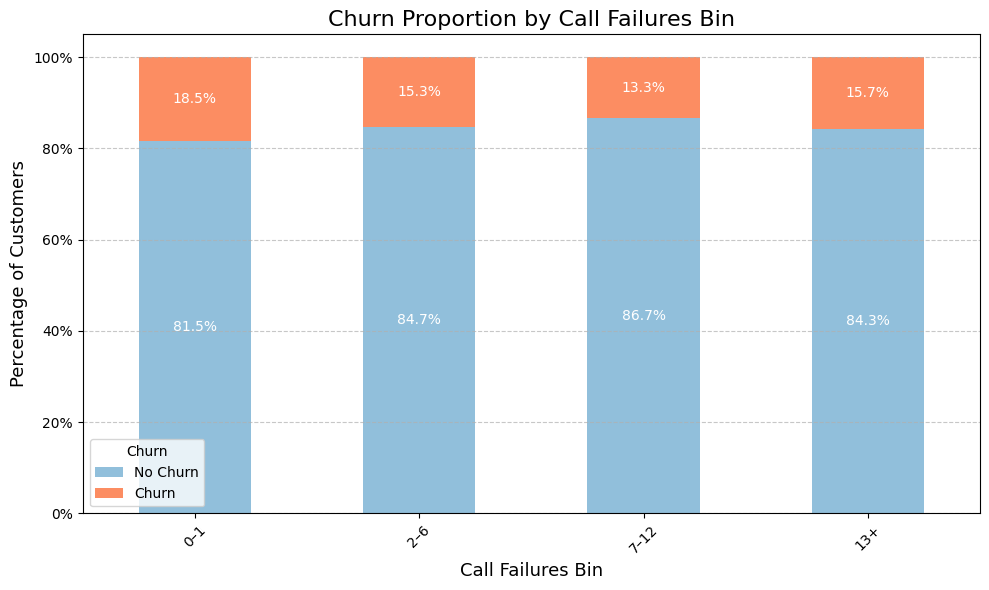

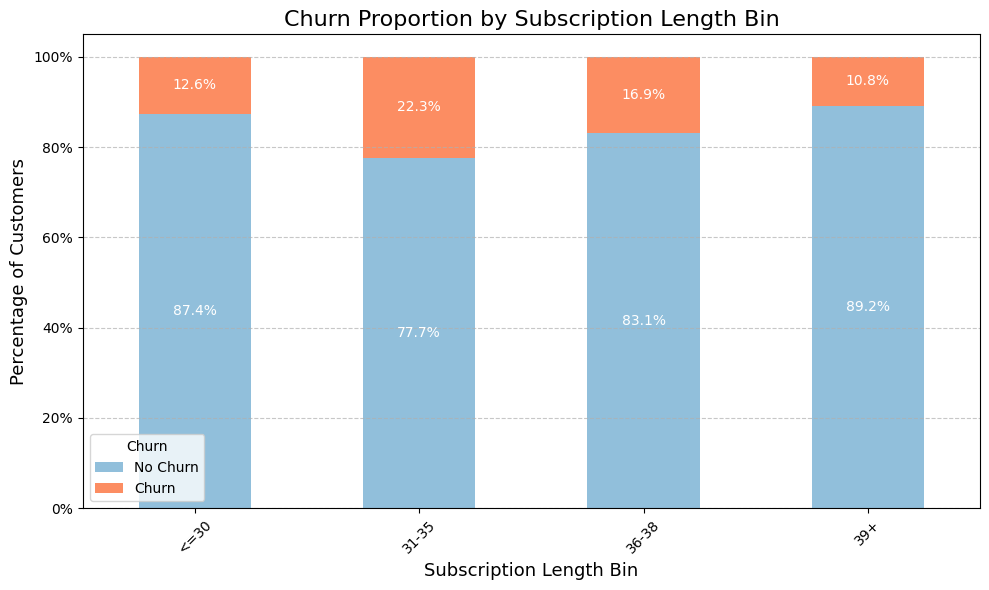

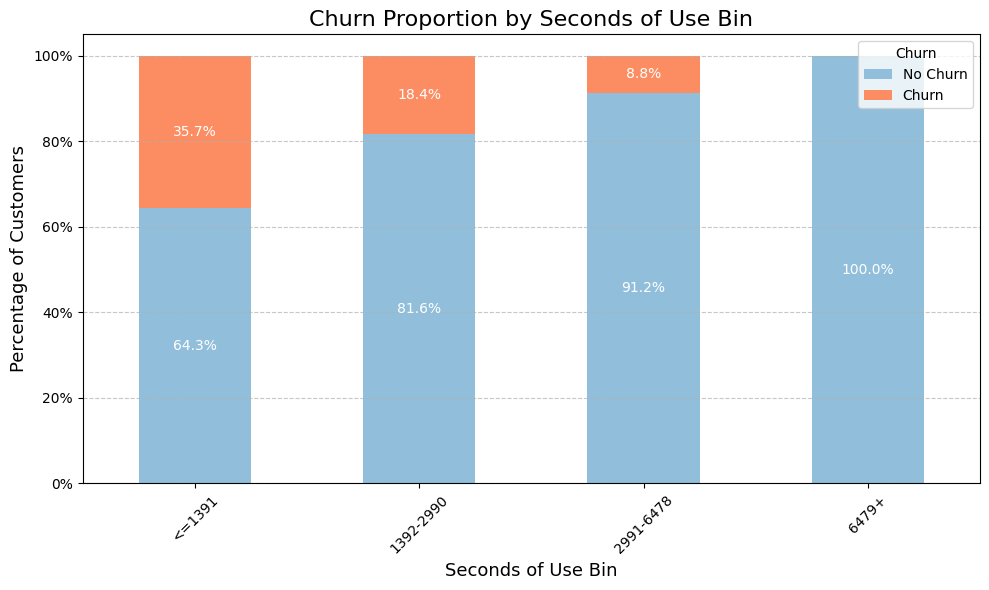

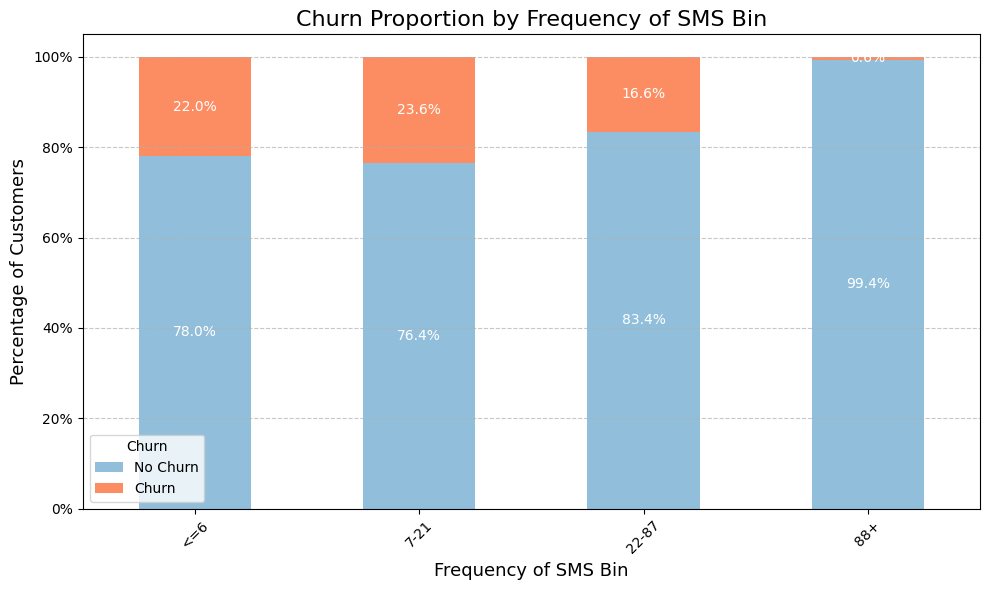

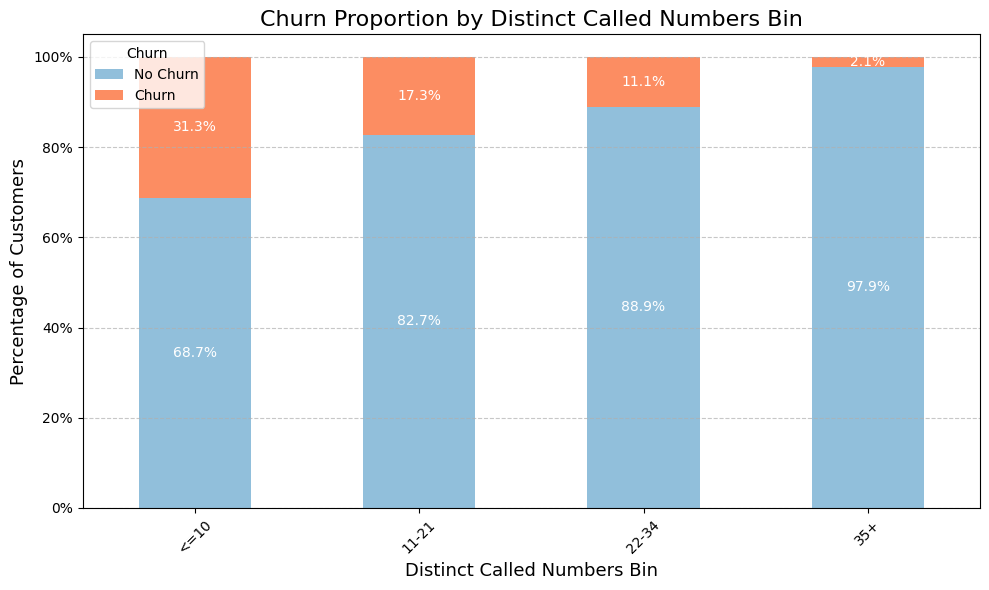

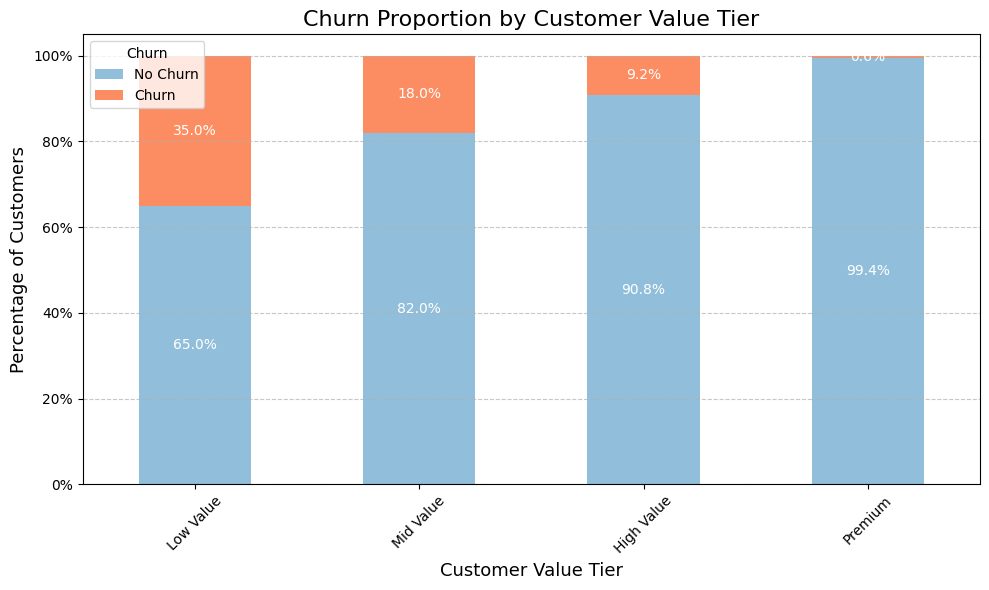

In [32]:
plot_stacked_churn_percent(df, bin_cols)